In [256]:
import pandas as pd

In [257]:
titanic = pd.read_csv('D:\\ML PROJECTS\\titanic.csv')
titanic.shape
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [258]:
X=titanic[['Pclass','Sex','Fare','Embarked','Age']]
y=titanic['Survived']

In [259]:
print("Age:",str(X['Age'].isnull().sum()))
print("Pclass:",str(X['Pclass'].isnull().sum()))
print("Sex:",str(X['Sex'].isnull().sum()))
print("Fare:",str(X['Fare'].isnull().sum()))
print("Embarked:",str(X['Embarked'].isnull().sum()))

Age: 177
Pclass: 0
Sex: 0
Fare: 0
Embarked: 2


In [260]:
# Missing values
mean =  X['Age'].mean()
mean.round()
X['Age'].fillna(mean,inplace=True)

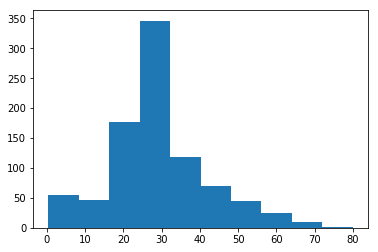

In [261]:
import matplotlib.pyplot as plt
plt.hist(X['Age'])
plt.show()

In [262]:
#Checking for missing values --> notnull()
X[X['Embarked'].notnull()].shape

(889, 5)

In [263]:

#Check for outliers for numeric features
print("Min_threshold:"+str(X['Age'].mean() - 3*X['Age'].std()))

print("Min_Value  :"+str(X['Age'].min()))


print("Max_threshold:"+str(X['Age'].mean() + 3*X['Age'].std()))

print("Min_Value  :"+str(X['Age'].max()))

Min_threshold:-9.306928030949827
Min_Value  :0.42
Max_threshold:68.70516332506747
Min_Value  :80.0


In [264]:
# Outliers : Age
max_age = X['Age'].mean()+(3*X['Age'].std())
X=X[X['Age'] <= max_age]
X.shape

(884, 5)

In [265]:
# Outliers : Fare
max_fare = X['Fare'].mean() + (3* X['Fare'].std())
X=X[X['Fare'] <= max_fare]
X.shape

(864, 5)

In [266]:
# The code below counts the ocurrence of each class of a text feature
X['Sex'].value_counts()

male      562
female    302
Name: Sex, dtype: int64

In [267]:
#converting text ino  numeric values
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [268]:
X["Embarked"] = enc.fit_transform(X["Embarked"].astype('str'))
X["Pclass"] = enc.fit_transform(X["Pclass"].astype('str'))
X["Sex"] = enc.fit_transform(X["Sex"].astype('str'))

In [269]:
X.head()

,Pclass,Sex,Fare,Embarked,Age
0,2,1,7.2500,2,22.0
1,0,0,71.2833,0,38.0
2,2,0,7.9250,2,26.0
3,0,0,53.1000,2,35.0
4,2,1,8.0500,2,35.0


In [270]:
# Normalization
X['Age'] = (X['Age'] -  X['Age'].min())/(X['Age'].max() - X['Age'].min())
X['Fare'] = (X['Fare'] -  X['Fare'].min())/(X['Fare'].max() - X['Fare'].min())
X['Pclass'] = (X['Pclass'] -  X['Pclass'].min())/(X['Pclass'].max() - X['Pclass'].min())
X['Embarked'] = (X['Embarked'] -  X['Embarked'].min())/(X['Embarked'].max() - X['Embarked'].min())

In [271]:
X

,Pclass,Sex,Fare,Embarked,Age
0,1.0,1,0.043975,0.666667,0.329064
1,0.0,0,0.432369,0.000000,0.573041
2,1.0,0,0.048069,0.666667,0.390058
3,0.0,0,0.322078,0.666667,0.527295
4,1.0,1,0.048827,0.666667,0.527295
...,...,...,...,...,...
886,0.5,1,0.078852,0.666667,0.405306
887,0.0,0,0.181965,0.666667,0.283318
888,1.0,0,0.142236,0.666667,0.446464
889,0.0,1,0.181965,0.000000,0.390058
